Лабораторная работа №5



1. Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [2]:
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
df = pd.DataFrame({'flag' : [10,10,20,10,10,10,20,10,10,20,10,10,20,10,20,10,10,20,20,20,20,10,10,10,20,10],
    'group' : [1,2,2,1,1,1,1,1,2,1,1,2,2,2,2,2,1,2,1,1,2,1,2,2,2,1]})
df

,flag,group
0,10,1
1,10,2
2,20,2
3,10,1
4,10,1
5,10,1
6,20,1
7,10,1
8,10,2
9,20,1


In [4]:
k = pd.crosstab(df['flag'], df['group'])
k

group,1,2
flag,,
10,9,7
20,4,6


2. Побудувати графік, що відображає розподіл ознак в групах.

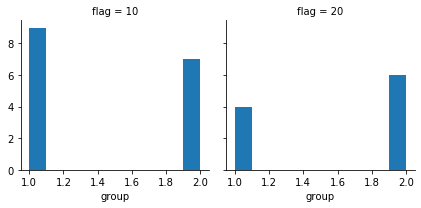

In [40]:
fig = sns.FacetGrid(df, col="flag")
fig = fig.map(plt.hist, "group");

3. Написати функцію, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.

In [41]:
def Pirson_Test(inf, significant_level):
    flag = []*0
    group = []*0
    f=0
    for i in inf.iloc[:,0]:
        f = True
        for j in flag:
            if(i == j):
                f = False
        if(f):
            flag.append(i)
    for i in inf.iloc[:,1]:
        f = True
        for j in group:
            if(i == j):
                f = False
        if(f):
            group.append(i)
    flag = np.sort(flag)
    group = np.sort(group)
    criterion = pd.DataFrame({
        (group[0]):(0 for i in range(len(flag))),
        (group[1]):(0 for i in range(len(flag))),}, index = flag)
    for i in range(len(inf)):
        criterion [inf.iloc[i,1]][inf.iloc[i,0]] += 1
    if (sum(criterion.iloc[:,0]) != sum(criterion.iloc[:,1])):
        for i in criterion.iloc[:,1]:
            criterion[criterion.columns[1]] = [i/sum(criterion.iloc[:,1])*sum(criterion.iloc[:,0])]
    else:
        criterion[criterion.columns[1]] = criterion[criterion.columns[1]]
    criterion["(𝑛𝑖−𝑛̀𝑖)^2"] = [(criterion.iloc[i,0] - criterion.iloc[i,1])**2 for i in range(len(criterion))]
    criterion["(𝑛𝑖−𝑛̀𝑖)^2/𝑛̀𝑖"] = [criterion.iloc[i,2]/criterion.iloc[i,1] for i in range(len(criterion))]
    print("Таблиця спряженості:")
    print(criterion)
    hi = sum(criterion.iloc[:,3])
    print("\nχ^2 = " + str(hi))
    print("Кількість ступенів свободи: " + str(len(criterion)-1))
    table = pd.read_excel("Таблиця критичних значень для критерію Пірсона.xlsx").iloc[len(criterion)-1, 1 if(significant_level == 0.01) else 2]
    print("χ^2 критичне = " + str(table))
    result = 0
    if (hi < table):
        result = "Розбіжність відсутня або не суттєва, оскільки %.5f "%hi+"< %.1f (критичне)"%table
    else:
        result = "Розбіжність присутня, оскільки %.5f "%hi+"> %.1f (критичне)"%table
    return result

4. Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості

In [42]:
Pirson_Test(df, 0.01)

Таблиця спряженості:
    1  2  (𝑛𝑖−𝑛̀𝑖)^2  (𝑛𝑖−𝑛̀𝑖)^2/𝑛̀𝑖
10  9  7           4        0.571429
20  4  6           4        0.666667

χ^2 = 1.2380952380952381
Кількість ступенів свободи: 1
χ^2 критичне = 6.6


'Розбіжність відсутня або не суттєва, оскільки 1.23810 < 6.6 (критичне)'

In [43]:
Pirson_Test(df, 0.05)

Таблиця спряженості:
    1  2  (𝑛𝑖−𝑛̀𝑖)^2  (𝑛𝑖−𝑛̀𝑖)^2/𝑛̀𝑖
10  9  7           4        0.571429
20  4  6           4        0.666667

χ^2 = 1.2380952380952381
Кількість ступенів свободи: 1
χ^2 критичне = 3.8


'Розбіжність відсутня або не суттєва, оскільки 1.23810 < 3.8 (критичне)'

5. Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп. Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами).

In [133]:
proc110 = 0
proc120 = 0
proc210 = 0
proc220 = 0
proc110 = str((9/13)*100) + "%"
print(proc110)
proc120 = str((4/13)*100) + "%"
print(proc120)
proc210 = str((7/13)*100) + "%"
print(proc210)
proc220 = str((6/13)*100) + "%"
print(proc220)

69.23076923076923%
30.76923076923077%
53.84615384615385%
46.15384615384615%


In [25]:
d = {'group 1': [9, 4], 'group 2': [7, 6], 'group 1 in %': [69.23076923076923,30.76923076923077], 
     'group 2 in %': [53.84615384615385,46.15384615384615]}
new_df = pd.DataFrame(data=d,index = [10,20])
new_df

,group 1,group 2,group 1 in %,group 2 in %
10,9,7,69.230769,53.846154
20,4,6,30.769231,46.153846
